There are standard modules that you probably always want to load at the beginning of your program.
- `numpy` which allows using vectors,matrices,random numbers,equation solvers, and much more)
- `matplotlib.pyplot` to make figures 

Here we also load `pandas` which creates nice tables and can be used to load data from Excel files like we did in HW 1.

In [1]:
# Import Numpy and Matplotlib libraries
import numpy as np
import matplotlib.pyplot as plt

### The Problem
Recall that the question tells us that TFP $A$ evolves according to the following equation

$$
\dot{A} = L_A^{\lambda} A^{\phi}.
$$

We are given the hint to approximate time with discrete intervals $dt = 0.01$. Thus, time evolves as
$[1,1.01,1.02,...]$. We therefore approximate the evolution of TFP by $\dot{A} \approx
\frac{A_{t+dt} - A_t}{dt}$ or

$$
A_{t+dt} = A_t + \left(L_{A,t}^{\lambda} A_t^{\phi}\right) * dt.
$$

Likewise, we will approximate population growth by $\dot{L} \approx \frac{L_{t+dt} - L_t}{dt}$ or

$$
L_{t+dt} = L_t + (n L_t) * dt.
$$



### Main Function
We will now write a function that takes as inputs the population growth rate $n$, the decreasing
returns parameter on labour $\lambda$, the initial value for labour $L_{A,0}$, the total period
length $T$, and the timestep $dt$.

Our function will start with initial conditions and iterate the system forward for $T$ time periods,
each of length $dt$. In code, this will involve a `for` loop.

In [2]:
# Let us do the interesting bit now and construct our function that iterates from initial values

def iterate_forward(n, lam, phi, L0, A0, T, dt):

    # Initialise empty arrays (= vectors) to be filled in our iteration
    # The vectors will be of length T: A[0] will correspond to time 1, A[1] to time 1.01, A[2] to
    # time 1.02m and so forth until A[T-1] which corresponds to time 1+(T-1)*dt
    A_path = np.empty(T) 
    L_path = np.empty(T)

    A_path[0] = A0 # A[0] is our initial condition and which is known and denoted by A0
    L_path[0] = L0 # L[0] is our initial condition and which is known and denoted by L0

    for t in range(T-1):
        # for each t we will need to compute A(t+dt) and L(t+dt) using the formulas above
        A_path[t+1] = A_path[t] + (L_path[t]**lam) * (A_path[t]**phi) * dt
        L_path[t+1] = L_path[t] * (1 + n * dt)
    
    # Let us compute the growth rate
    # Initialise the vector of growth rates
    gA_path = np.empty(T-1) # Now a vector of length T-1 as we lose one element by differencing

    for t in range(T-1):
        # for each t we will need to compute the growth rate (A(t+dt)-A(t))/dt/A(t)
        gA_path[t] = (A_path[t+1] - A_path[t]) / dt / A_path[t]

    # We will return 3 values: the growth rate of A, the time path for A and the time path for L
    return (gA_path, A_path, L_path)

In [3]:
# Set parameters
n = 0.02    # population growth rate
L0 = 1.     # initial population

dt = 0.01   # time step
T = int(700 / dt) # set time some total time horizon
trange = 1 + np.arange(T) * dt # this now gives us the time sequence [1, 1.01, 1.02, ...] (look up numpy.arange)

We now compute the time paths for each of the six cases.

1. $n=0.02$, $\lambda=1$, $\phi=0$, $L_A(1) = 1$, and $1/n$.
2. $n=0.02$, $\lambda=1$, $\phi=0$, $L_A(1) = 1$, and $0.1/n$.
3. $n=0.02$, $\lambda=1$, $\phi=0$, $L_A(1) = 1$, and $50/n$.
4. $n=0.02$, $\lambda=1/2$, $\phi=1/2$, $L_A(1) = 1$, and $(1/n)^2$.
5. $n=0.02$, $\lambda=1/2$, $\phi=1/2$, $L_A(1) = 1$, and $(0.1/n)^2$.
6. $n=0.02$, $\lambda=1/2$, $\phi=1/2$, $L_A(1) = 1$, and $(50/n)^2$.

In [4]:
# Case 1
gA_path1, A_path1, L_path1 = iterate_forward(n, 1., 0., 1, 1./n, T, dt)
# Case 2
gA_path2, A_path2, L_path2 = iterate_forward(n, 1., 0., 1, 0.1/n, T, dt)
# Case 3
gA_path3, A_path3, L_path3 = iterate_forward(n, 1., 0., 1, 50/n, T, dt)
# Case 4
gA_path4, A_path4, L_path4 = iterate_forward(n, 0.5, 0.5, 1, (1./n)**2, T, dt)
# Case 5
gA_path5, A_path5, L_path5 = iterate_forward(n, 0.5, 0.5, 1, (0.1/n)**2, T, dt)
# Case 6
gA_path6, A_path6, L_path6 = iterate_forward(n, 0.5, 0.5, 1, (50/n)**2, T, dt)

Congratulations! You've just simulated time paths for 6 different cases. Take a time to appreciate
the beauty of this. By writing a function to do the iteration, we only needed change the arguments
of the function. We saved lots of lines of code, making the code both easier to read and less prone
to errors.

The last thing that we need to do is to plot the time paths for the first and the last three cases, respectively.

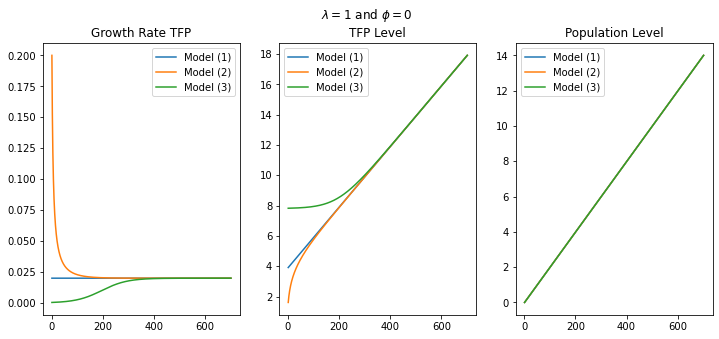

In [5]:
# Cases 1 to 3

# Initialise the figure and 3 subplots: (i) for the time path of gA (ii) time path of A (iii) time
# path of L
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (12, 5)) # this creates 3 subplots

ax1.plot(trange[1:], gA_path1, label='Model (1)')
ax1.plot(trange[1:], gA_path2, label='Model (2)')
ax1.plot(trange[1:], gA_path3, label='Model (3)')

ax2.plot(trange, np.log(A_path1), label='Model (1)')
ax2.plot(trange, np.log(A_path2), label='Model (2)')
ax2.plot(trange, np.log(A_path3), label='Model (3)')

ax3.plot(trange, np.log(L_path1), label='Model (1)')
ax3.plot(trange, np.log(L_path2), label='Model (2)')
ax3.plot(trange, np.log(L_path3), label='Model (3)')

# Provide titles and legend to plots
fig.suptitle(r'$\lambda = 1$ and $\phi = 0$')
ax1.set_title('Growth Rate TFP')
ax2.set_title('TFP Level')
ax3.set_title('Population Level')

ax1.legend()
ax2.legend()
ax3.legend()

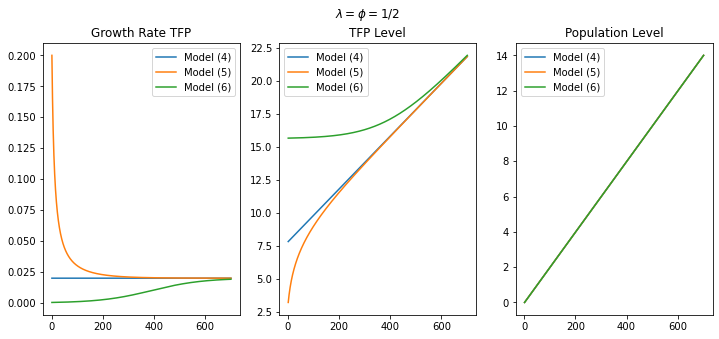

In [6]:
# Cases 4 to 6

# Initialise the figure and 3 subplots: (i) for the time path of gA (ii) time path of A (iii) time
# path of L
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (12, 5)) # this creates 3 subplots

ax1.plot(trange[1:], gA_path4, label='Model (4)')
ax1.plot(trange[1:], gA_path5, label='Model (5)')
ax1.plot(trange[1:], gA_path6, label='Model (6)')

ax2.plot(trange, np.log(A_path4), label='Model (4)')
ax2.plot(trange, np.log(A_path5), label='Model (5)')
ax2.plot(trange, np.log(A_path6), label='Model (6)')

ax3.plot(trange, np.log(L_path4), label='Model (4)')
ax3.plot(trange, np.log(L_path5), label='Model (5)')
ax3.plot(trange, np.log(L_path6), label='Model (6)')

# Provide titles and legend to plots
fig.suptitle(r'$\lambda = \phi = 1/2$')
ax1.set_title('Growth Rate TFP')
ax2.set_title('TFP Level')
ax3.set_title('Population Level')

ax1.legend()
ax2.legend()
ax3.legend()